In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ec = pd.read_csv('data/ecommerce.csv')
print(df_ec.shape)
df_ec.head(3)

(500, 8)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
# 0. Descriptive statistics for numerical columns
# 수치형 변수들의 기술통계량 살펴보기
desc_stats = df_ec.describe()   #데이터의 기본 통계 요약값을 보여주는 함수  디스크라이브
desc_stats

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Text(0.5, 1.0, 'Distribution of Yearly Amount Spent')

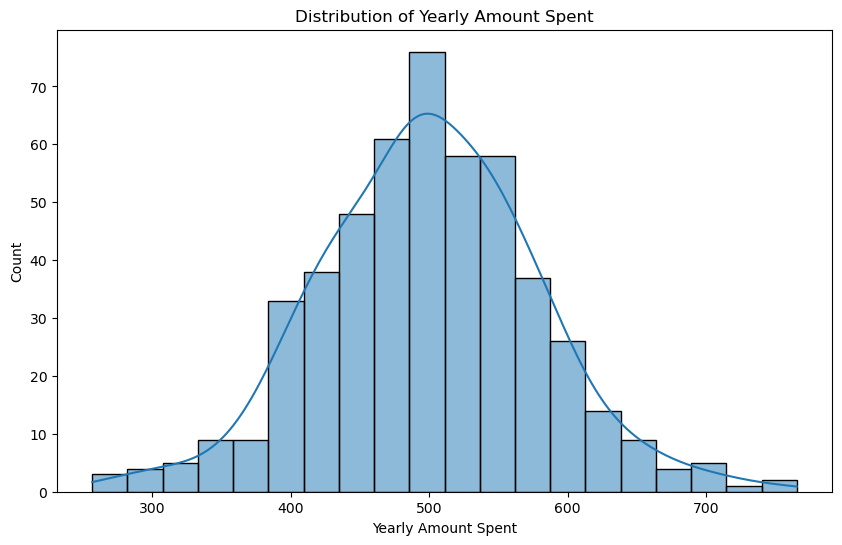

In [21]:
# 1. Distribution of the target variable (Yearly Amount Spent)
# 타겟변수인 고객 연간 지출액 히스토그램 그리기
plt.figure(figsize=(10, 6))  #피겨(숫자 수치)
sns.histplot(df_ec['Yearly Amount Spent'], kde=True)  #이어리 어마운트 스펜트 (1년 동안 지출한 금액)
#kde=True 뜻 데이터의 분포를 부드러운 곡선으로 그려주는 것
plt.title('Distribution of Yearly Amount Spent')

In [6]:
# 2. 상관관계 분석, 히트맵으로 표현 => Correlation Heatmap
df_ec.info()  #👉 데이터의 전체 구조를 보여주는 명령어

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# 실수형 변수들만 추출 후 상관관계 분석 수행

# 👉 float64 타입(실수형 숫자) 컬럼만 선택하라
# 왜?
# 상관계수(corr)는 숫자 데이터끼리만 계산 가능
# 문자(object)는 계산 못함

corr = df_ec.select_dtypes(include=['float64']).corr()
corr

# ✅ 2️⃣ .corr()
# 👉 상관계수 계산
# 두 변수 사이의 관계 강도 측정
# 값 범위: -1 ~ 1
# 값	의미
# 1	완전한 양의 상관
# 0	관계 없음
# -1	완전한 음의 상관

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


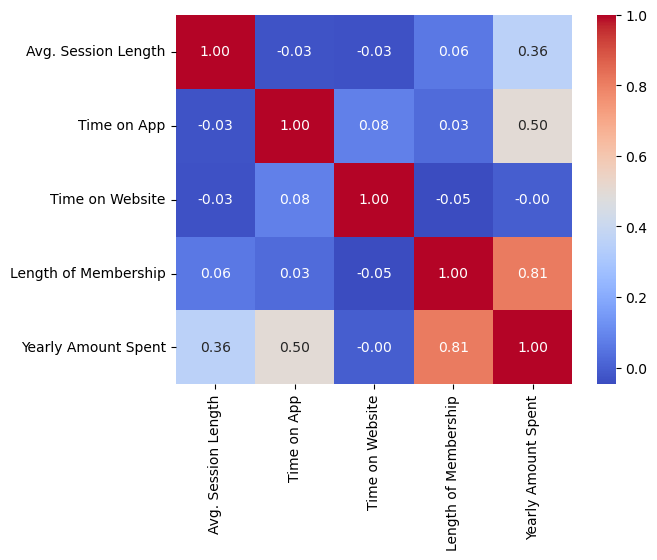

In [8]:
# 히트맵   
#✅ 1️⃣ sns.heatmap(corr)👉상관계수 행렬(corr)을 색깔로 보여주는 그래프 2️⃣ annot=True👉 각 칸에 숫자도 같이 표시해라
#3️⃣ fmt='.2f' 👉 숫자를 소수점 2자리까지 표시 ✅ 4️⃣ cmap='coolwarm'👉 색깔 테마 설정
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm');

In [ ]:
#설명
# 변수 간의 상관관계를 한눈에 파악합니다. 
# 특히 종속 변수(Yearly Amount Spent)와 상관계수가 높은 독립 변수(예: Length of Membership)를 
# 우선적으로 주목해야 합니다.

<Figure size 500x500 with 0 Axes>

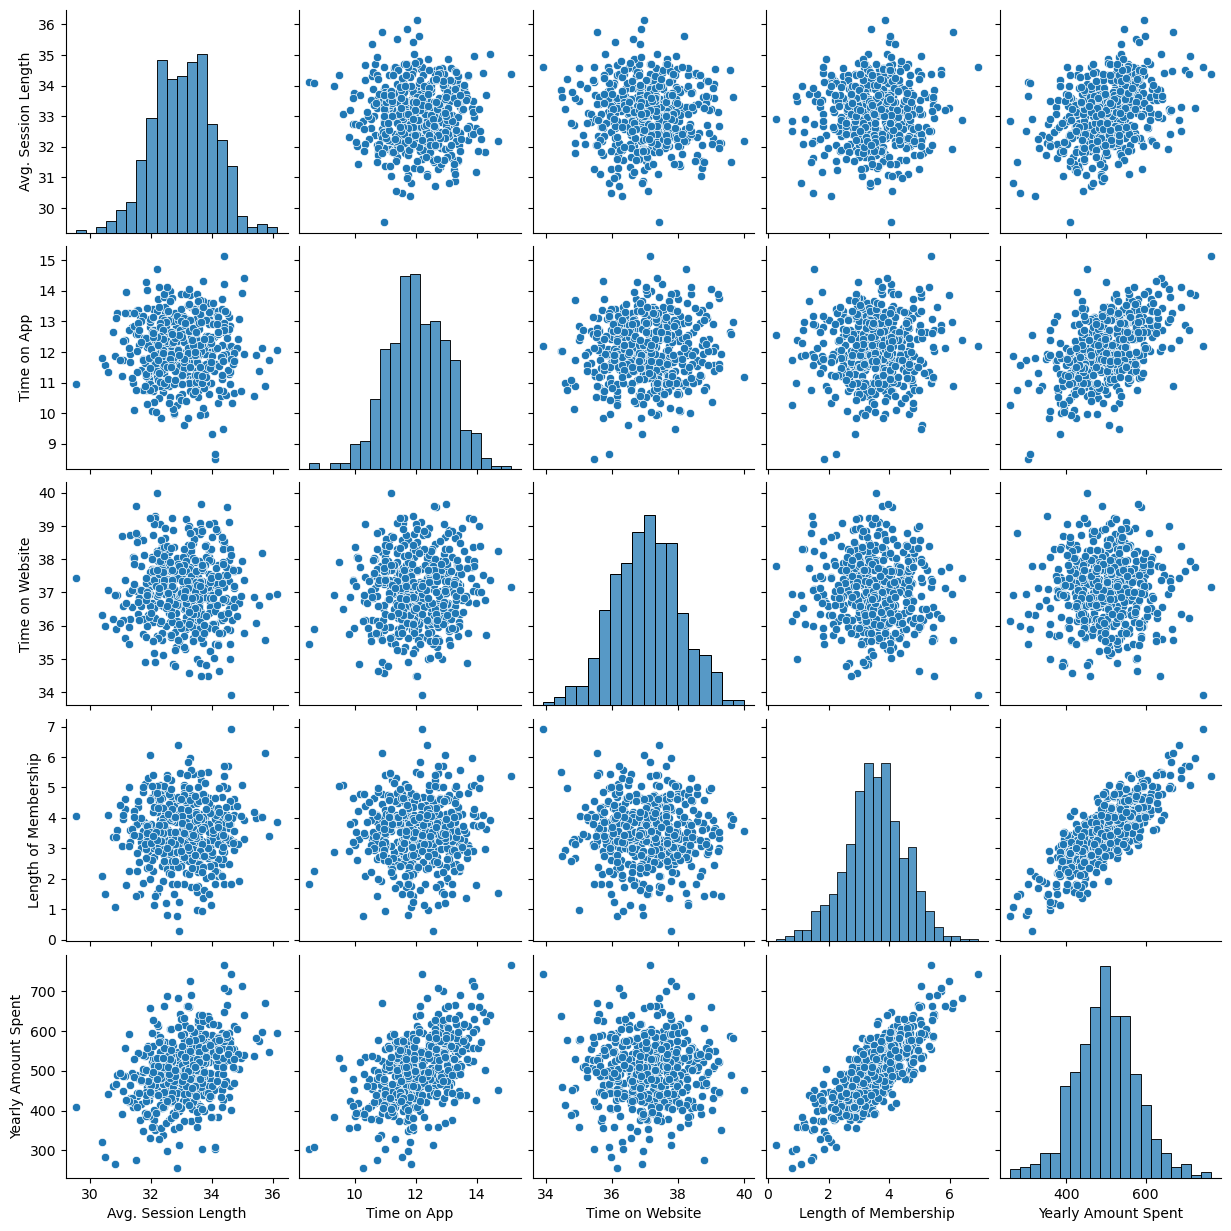

In [9]:
# 3. Pairplot to see relationships between all numerical features
# pairplot을 통해 모든 수치형 변수들 간 관계를 보자.

#✅ pairplot 페어플랏 이 뭐냐?👉 모든 변수들끼리의 관계를 한 번에 보여주는 종합 그래프
sns.pairplot(df_ec);

<Figure size 1000x600 with 0 Axes>

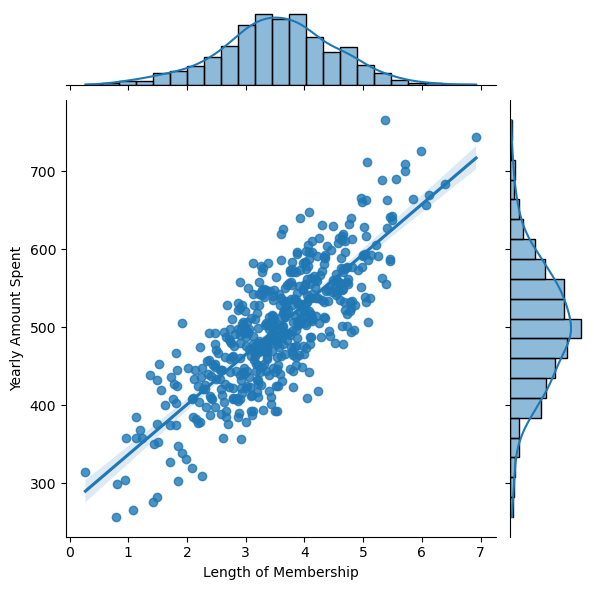

In [10]:
# 4. Specific relationship between "Length of Membership" and "Yearly Amount Spent" (likely high correlation)
# 특히 멤버십 기간과 연간 지출액 간 관계를 조사하자.

plt.figure(figsize=(10, 6))   
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=df_ec, kind='reg')
# x렝쓰 어브 멤버쉽 회원 가입 기간 / y이어리 어마운트 스펜트 👉 1년 동안 지출한 금액,연간 소비 금액

# 선형회귀 모델링

In [ ]:
#선형회귀 모델링이란? 👉 **독립변수(X)**와 종속변수(y) 사이의 관계를 **직선(선형식)**으로 표현해서 숫자를 예측하는 모델이야.

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
# 독립변수, 종속변수 세팅
X = df_ec.select_dtypes(include=['float64']).drop(columns=['Yearly Amount Spent'])
y = df_ec['Yearly Amount Spent']


In [17]:
# 학습셋, 테스트셋 분리
#  변수 = rain_test_split 이 뭐냐?
# 데이터를 훈련용(학습용) 과 평가용(테스트용) 으로 나누는 함수야.
# 왜 나누냐?
# 📌 이유:
# 모델이 공부한 데이터로 또 시험 보면 100점 나올 수 있음 (과적합)
# 그래서 처음 보는 데이터로 시험을 봐야 진짜 실력 확인 가능
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
#test_size = 0.3  학습70 테스트30 테스트를 너무 많이하게되면 학습을 못합 그래서 보통 0.2~0.3이라고함

#⃣ random_state = 100👉 데이터를 나눌 때 섞는 기준값

# 선형회귀적합

In [18]:
import statsmodels.api as sm
#add_constant 상수항(intercept, 절편)을 추가하는 함수
# 모델에 상수항 추가 👉 변수값과 상관없이 항상 더해지는 고정된 값👉 회귀식에서의 절편(intercept)
X_train_const = sm.add_constant(X_train)  
X_test_const = sm.add_constant(X_test)

In [19]:
# 모델 생성 및 학습 (최소제곱법 : OLS, Ordinary Least Squares)
ls = sm.OLS(y_train, X_train_const).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     6062.
Date:                 Thu, 12 Feb 2026   Prob (F-statistic):          3.96e-318
Time:                         16:21:23   Log-Likelihood:                -1288.1
No. Observations:                  350   AIC:                             2586.
Df Residuals:                      345   BIC:                             2605.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1061.0168     26.050    -40.729      0.000   -1112.254   -1009.779
Avg. Session Length     26.1553      0.517     50.562      0.000      25.138      27.173
Time on App             38.6201      0.515     74.925      0.000      37.606      39.634
Time on Website          0.3176      0.509      0.624      0.533      -0.684       1.319
Length of Membership    61.8204      0.520    118.967      0.000      60.798      62.842
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.063
Skew:                           0.033   Prob(JB):                        0.969
Kurtosis:                       2.995   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# 테스트 데이터에 대해서도 r2 score 계산
from sklearn.metrics import r2_score

# 2. 학습된 모델(ls)을 사용하여 테스트 데이터의 예측값 생성
y_pred = ls.predict(X_test_const)

# 3. 실제값(y_test)과 예측값(y_pred)을 비교하여 R2 계산
test_r2 = r2_score(y_test, y_pred)

print(f"테스트 데이터 R2 결정계수: {test_r2:.4f}")

테스트 데이터 R2 결정계수: 0.9796


In [ ]:
# 분석 결과, 이 모델은 과적합보다는 데이터 자체가 매우 강력한 선형 관계를 갖고 있는 경우로 판단됩니다.

# Train R^2: 0.9860, Test R^2: 0.9796두 값의 차이가 매우 적습니다. 
# 만약 과적합이었다면 학습셋은 0.98인데 테스트셋은 0.7이나 0.8 정도로 크게 떨어졌을 것입니다. 
# 따라서 이 모델은 새로운 데이터에 대해서도 예측력이 매우 우수하다고 볼 수 있습니다.

In [ ]:
# [실습] 이 모델에서 유의한 독립변수는 무엇인가요?
Avg. Session Length, Time on App, Length of Membership

In [ ]:
#[고급] 다중공선성 높으면 나쁜거라고 보면된다
#그거 확인하는 VIF 인수가 있다 
'''
. 다중공선성(Multicollinearity) 확인
변수들끼리 서로 너무 밀접하게 연관되어 있어 $R^2$가 가짜로 높아진 것은 아닌지 VIF(분산 팽창 인수)를 확인했습니다.
모든 독립변수의 VIF 지수가 1.01 내외로 측정되었습니다.
일반적으로 VIF가 10 이상이면 위험, 5 이상이면 주의로 보는데, 1에 가깝다는 것은 변수 간의 독립성이 매우 잘 유지되고 있다는 뜻입니다.
---
이 분석을 더 자세히 설명해줘.
- 다중공선성이랑 상관관계가 무슨 차이가 있는지
- VIF 값을 구하는 코드
'''